# Tutorial

Hello and welcome! This tutorial will show you how to setup and use the *unnamed* package. This was designed to help you validate your yaml files before submitting them to HEP Data. I assume that your input files have been well formatted following the instructions at:

https://hepdata-submission.readthedocs.io/en/latest/introduction.html

In case you want to validate the formatting of your files, you can use one of the pre-existing tools such as:

https://github.com/HEPData/hepdata-validator

The aim of the *unnamed* package is not to validate your file format, but the contents. Essentially we want to check that we can use our hopefully-future-HEP-data yaml files to reproduce the distributions we expect. This is difficult to do by inspecting the raw table entries themselves, and so we will instead run some automated plotting and cross-checking code. There are three programs to help you with this. Jump to the relevant section of this tutorial if you want to run them now.

__inspect_yaml.py__: scans a bunch of yaml files and loads the tables into appropriate numpy arrays. If __--print__ is called, it will print the details of the tables found. If __--show__ is called, it will plot them on the screen (assuming that they are 1 or 2 dimensional). If __--save__ is called with a filename, it will save the plots.

__validate_yaml_files.py__: requires a __--yaml__ and a __--compare__ argument, where the latter represents a ROOT file containing some tables. The program will scan through the contents of _yaml_ and tell you if the contents matched any of the distributions in the *compare* file.

__plot_ratios.py__: creates ratio plots using the tables found in the file, where __--num__ and __--den__ arguments specify keywords used to identify the numerator and denominators. This is used for e.g. checking that data/MC or cross-section-A/cross-section-B ratios can be correctly reproduced using the yaml files. Some extra metrics (the chi2 and bin-by-bin ratio values) are also provided.

### Setup

We use python3. The following dependencies are required:

- matplotlib
- numpy
- natsort
- uproot
- pyyaml

Note that we use the _uproot_ package to read in rootfiles, so we are not dependent on versions of e.g. pyroot.

## Plot contents of my yaml tables

We should always check that our yaml tables can reproduce the plots we made during our analysis. This can be done using the __inspect_yaml.py__ program. This will scan the input files and plot all the tables it finds, assuming that they are either 1 or 2 dimensional. Note that 2 dimensional distributions in yaml files are matrices as they assume binnings which factorise along the independent_variable axes. Any e.g. double-differential tables will be stored as 1-dimensional objects, and any empy bins will be ignored (empty means "-" not "0", so zero entries are allowed).

The following options are available:

<br>

In [1]:
%run inspect_yaml.py --help

INFO	inspect_yaml.py	Running program
INFO	inspect_yaml.py	  Usage: python3 inspect_yaml.py <yaml file(s) OR directory OR submission.yaml file>
INFO	inspect_yaml.py	  If input files/directory contains a submission.yaml file, all other inputs will be ignored
INFO	inspect_yaml.py	  I assume that you follow the format instructions provided at
INFO	inspect_yaml.py	      https://hepdata-submission.readthedocs.io/en/latest/introduction.html
INFO	inspect_yaml.py	  Optional arguments are:
INFO	inspect_yaml.py	         -h, --help		Print this help message and close
INFO	inspect_yaml.py	         -v, --verbosity	Set VERBOSE_LEVEL {-1, 0, 1, 2} (-1 by default)
INFO	inspect_yaml.py	         -r, --recursive	Allow recursive searching of directories
INFO	inspect_yaml.py	                        	Recursion stops if submission.yaml file is found
INFO	inspect_yaml.py	         -s, --save		Save plots to the file provided
INFO	inspect_yaml.py	         -t, --type		Specify input type as { root , yaml } (default 

<br>
<br>

For example, to run the script from the command line without making plots, use:

<br>
<br>

In [2]:
#  N.B. when I call this script inside iPython, I have to replace "python3" with "%run"

%run inspect_yaml.py --print ../HEP_datasets/HEPData-ins1609448-v2-yaml/Table3.yaml

INFO	inspect_yaml.py	Running program
HEP_data_utils.DistributionContainer "my_tables" with the following entries
INCLUSIVE DISTRIBUTIONS:
1D DISTRIBUTIONS:
   key: measured $R^\text{miss}$
      --> name "measured $R^\text{miss}$" with 5 bins
   key: expected $R^\text{miss}$
      --> name "expected $R^\text{miss}$" with 5 bins
   key: $\text{d}\sigma / \text{d} m_\text{jj} $ (SM prediction for numerator)
      --> name "$\text{d}\sigma / \text{d} m_\text{jj} $ (SM prediction for numerator)" with 5 bins
   key: $\text{d}\sigma / \text{d} m_\text{jj} $ (SM prediction for denominator)
      --> name "$\text{d}\sigma / \text{d} m_\text{jj} $ (SM prediction for denominator)" with 5 bins
2D DISTRIBUTIONS:
>=3D DISTRIBUTIONS:
DistributionContainer "my_tables" with the following entries

1D DISTRIBUTION with key measured $R^\text{miss}$, name measured $R^\text{miss}$ and 5 bins

DEPENDENT VARIABLE:
Dependent variable < measured $R^\text{miss}$ > with 5 values
-  Qualifier: PHASE SPACE = VBF
-

<br>
<br>

The above code successfully found all of the tables and printed the entries in a human readable format. This is useful for checking the table entries in detail. If I have many tables, this information might still be difficult to sift through, so I can also make the plots themselves using the --show option as follows:

<br>
<br>

INFO	inspect_yaml.py	Running program
HEP_data_utils.DistributionContainer "my_tables" with the following entries
INCLUSIVE DISTRIBUTIONS:
1D DISTRIBUTIONS:
   key: 10.17182/hepdata.78366.v2/t1||measured $R^\text{miss}$
      --> name "measured $R^\text{miss}$" with 7 bins
   key: 10.17182/hepdata.78366.v2/t1||expected $R^\text{miss}$
      --> name "expected $R^\text{miss}$" with 7 bins
   key: 10.17182/hepdata.78366.v2/t1||$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)" with 7 bins
   key: 10.17182/hepdata.78366.v2/t1||$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)" with 7 bins
   key: 10.17182/hepdata.78366.v2/t2||measured $R^\text{miss}$
      --> name "measured $R^\text{miss}$" with 6 bins
   key: 10.17182/hepdata.78

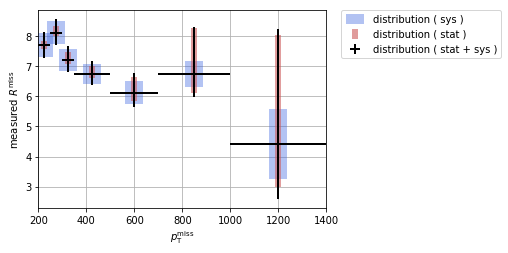

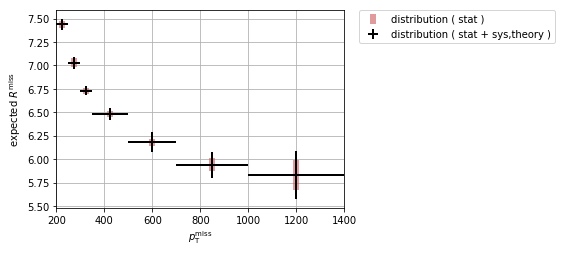

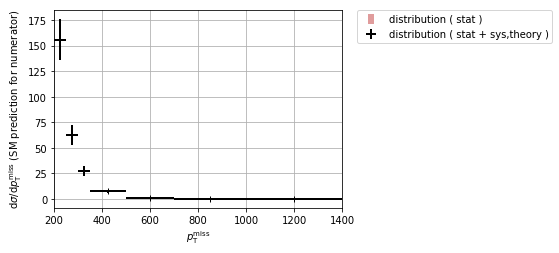

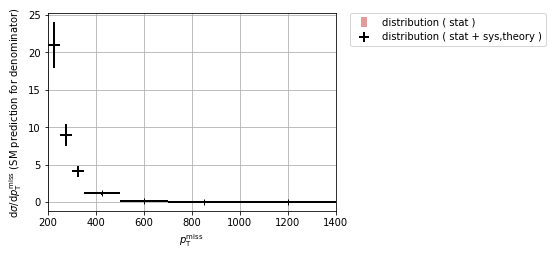

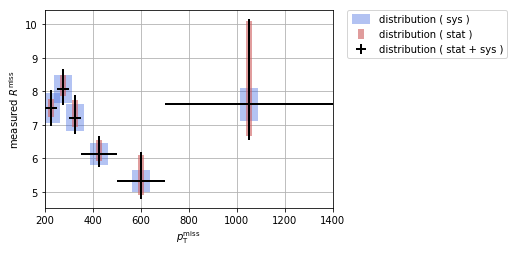

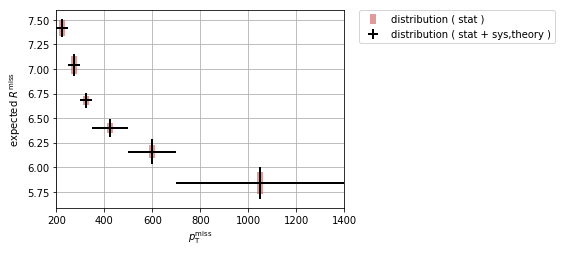

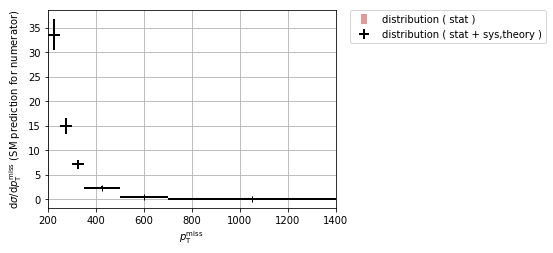

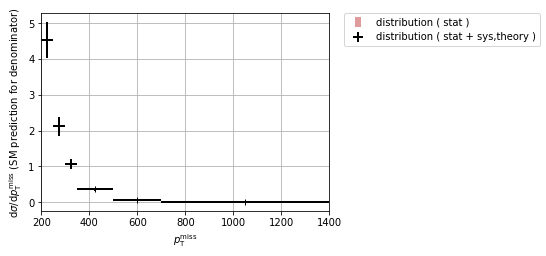

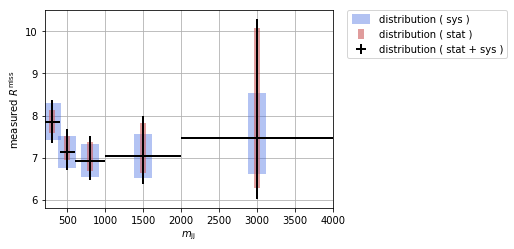

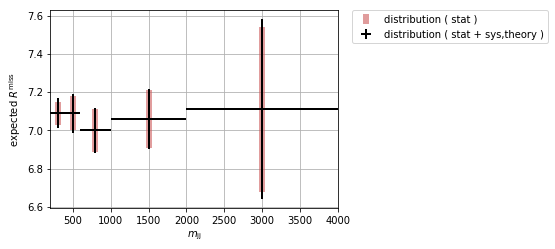

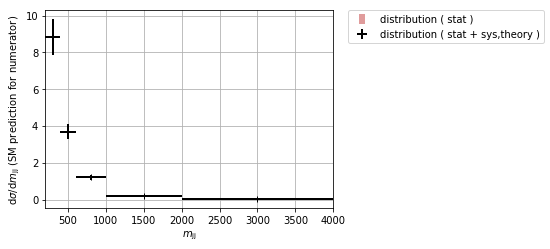

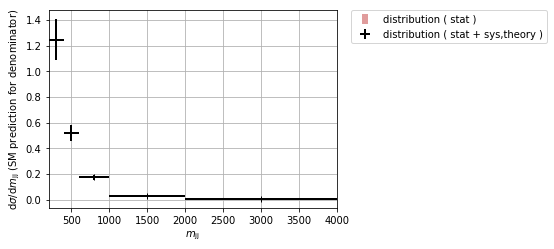

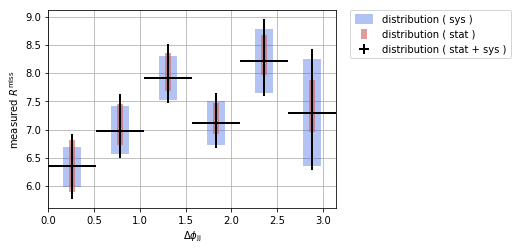

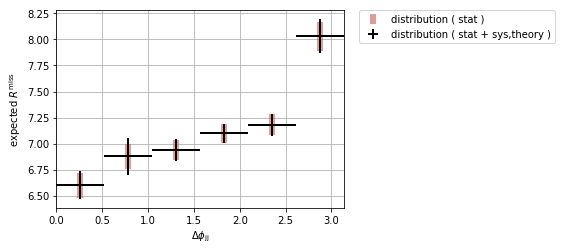

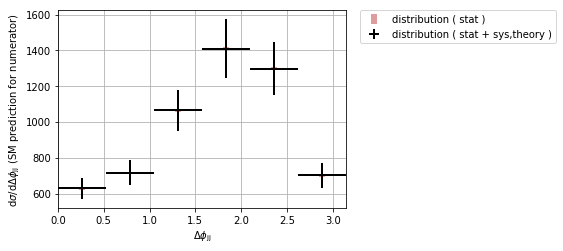

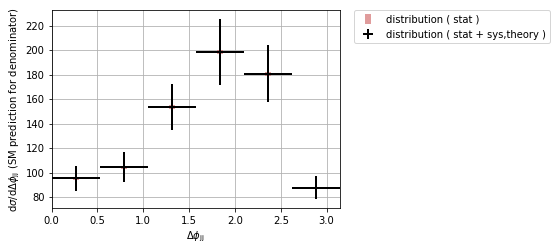

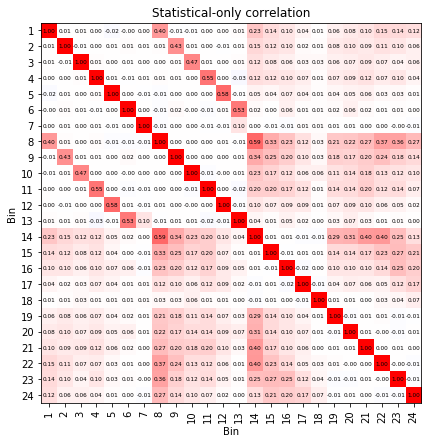

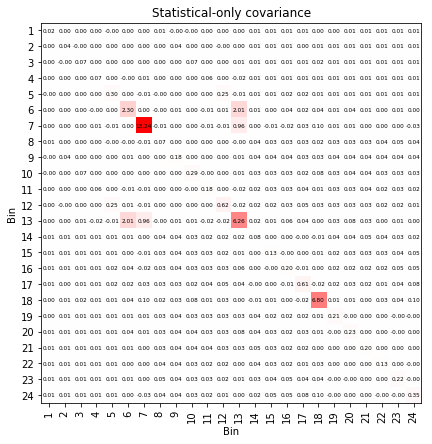

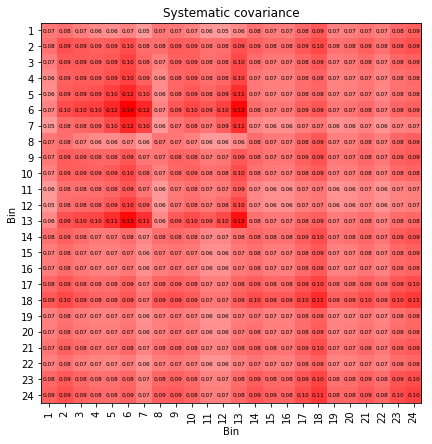

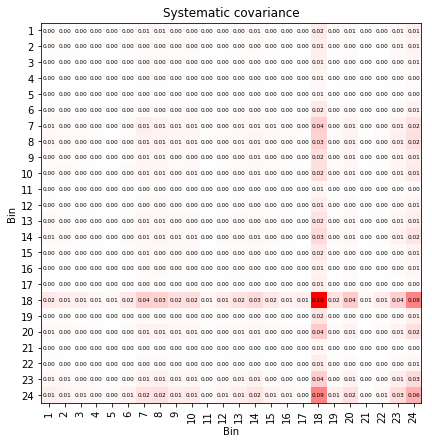

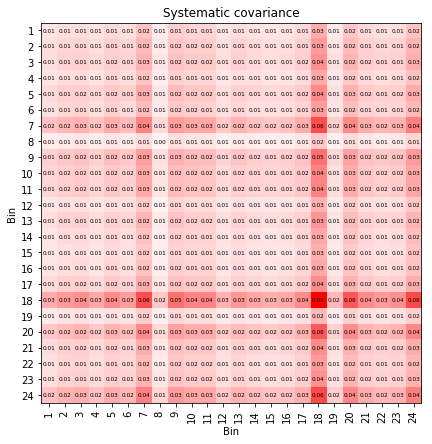

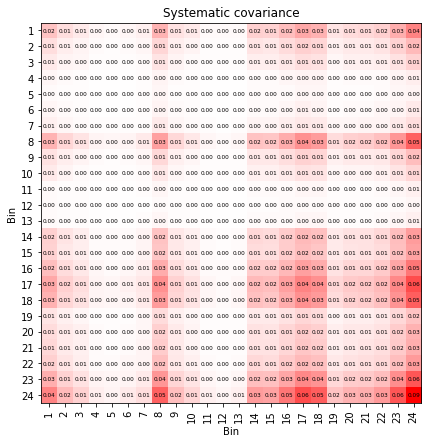

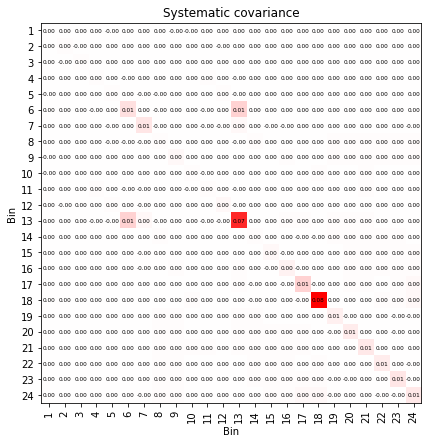

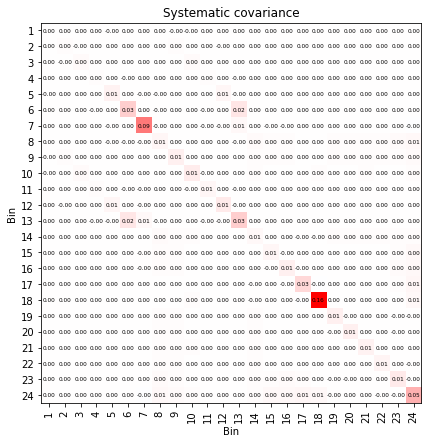

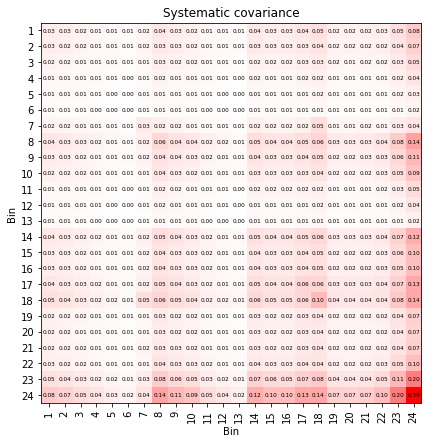

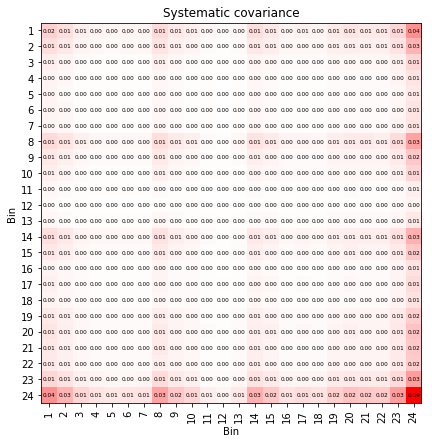

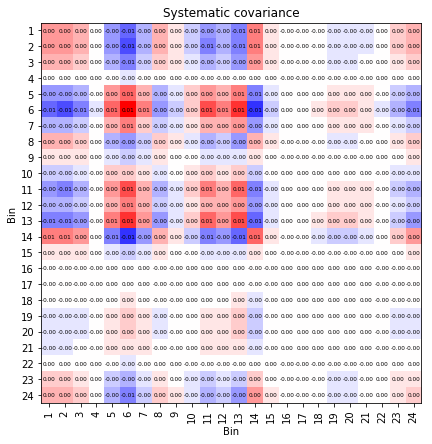

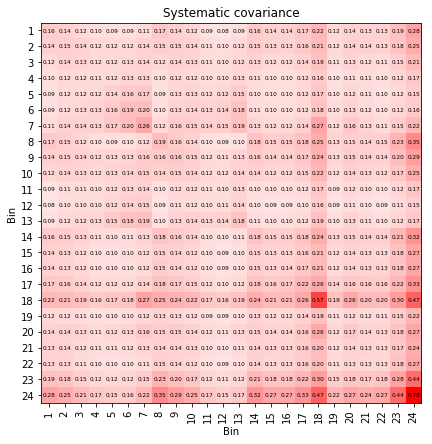

INFO	inspect_yaml.py	Program reached the end without crashing and will close :) Have a nice day...


In [3]:
%run inspect_yaml.py -r --show ../HEP_datasets/HEPData-ins1609448-v2-yaml

<br>
<br>

## Compare my yaml tables to a ROOT file

If you have a ROOT file with a distribution in, and you want to see whether a HEP data table is a good match, then we use the __validate_yaml_files.py__ script. The details are as follows:

<br>

In [4]:
%run validate_yaml_files.py --help

INFO	validate_yaml_files.py	Running program
INFO	validate_yaml_files.py	 Usage: python3 validate_yaml_files.py --yaml <yaml file(s)> --compare <root file(s)>
INFO	validate_yaml_files.py	 If inputs contain a submission.yaml file, all other inputs will be ignored
INFO	validate_yaml_files.py	 I assume that you follow the format instructions provided at
INFO	validate_yaml_files.py	     https://hepdata-submission.readthedocs.io/en/latest/introduction.html
INFO	validate_yaml_files.py	 Optional arguments are:
INFO	validate_yaml_files.py	      -h, --help	Print this help message and close
INFO	validate_yaml_files.py	      -v, --verbosity	Set VERBOSE_LEVEL {-1, 0, 1, 2} (-1 by default)
INFO	validate_yaml_files.py	      -r, --recursive	Allow recursive searching of directories
INFO	validate_yaml_files.py	                     	Recursion stops if submission.yaml file is found
INFO	validate_yaml_files.py	 N.B. you can validate your yaml file format using the package:
INFO	validate_yaml_files.py	     

<br>

... and the program is run like...

<br>

In [5]:
%run validate_yaml_files.py -r --yaml ../HEP_datasets/HEPData-ins1609448-v2-yaml/Table1.yaml --compare ../ROOT_datasets/HEPData-ins1609448-v2-root 

INFO	validate_yaml_files.py	Running program
--------------------------------------------------------------------------------------------------------------
DISTRIBUTION:    measured $R^\text{miss}$
     matches:    values     stat (down)     stat (up)     sys (down)     sys (up)     total (down)     total (up)
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
DISTRIBUTION:    expected $R^\text{miss}$
     matches:    values     stat     sys,theory     total (down)     total (up)
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
DISTRIBUTION:    $\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)
     matches:    values 

<br>

We have found a bunch of tables, with the observable quantities printed in purple. For each table, we have searched the contents of the ROOT file. The outputs are all green - but what does this mean?

- __values__: when this is green, it means that the ROOT file contained a distribution with the same binning and central values.
- ___uncertainty name___: when this is green, the ROOT file contained a distribution with the same binning, central values and uncertainties. Since a HEP data table contains many individual uncertainty sources, each one is compared with the ROOT table.
- ___uncertainty name (up/down)___: same as above, but for an asymmetric uncertainty source.
- ___total (up/down)___: same as above, but using the quadrature sum of all uncertainties in the HEP data table.

So this means that, in the above case, the ROOT file contained a distribution with the same binning and central values for every one of the uncertainty sources associated with every one of the tables. This is because I downloaded the ROOT file straight from HEP data itself, and compared it with the corresponding yaml files :) if a match is not found, then the corresponding entry is shown in red, e.g.

<br>

In [6]:
%run validate_yaml_files.py -r --yaml ../HEP_datasets/HEPData-ins1312978-v1-yaml/Table2.yaml --compare ../ROOT_datasets/HEPData-ins1609448-v2-root

INFO	validate_yaml_files.py	Running program
--------------------------------------------------------------------------------------------------------------
DISTRIBUTION:    SIGNAL STRENGTH
     matches:    values     err0 (down)     err0 (up)     total (down)     total (up)
--------------------------------------------------------------------------------------------------------------
INFO	validate_yaml_files.py	Program reached the end without crashing and will close :) Have a nice day...


<br>

Hopefully this will make it easy to see which component of the table has (or hasn't) been validated by the ROOT file you provided. For example, if you expected your file to contain the same central values and stat errors then the corresponding elements should light up in green, leaving everything else in red.

<br>
<br>

## Compare ratios

There is a good chance that you want to submit a SM prediction along with each set of measurements. In this case, you might want to double check the ratio between them. This is easily done using the __plot_ratios.py__ script.

<br>
<br>

In [7]:
%run plot_ratios.py --help

INFO	plot_ratios.py	Running program
INFO	plot_ratios.py	Usage: python3 plot_ratios.py --num <numerator tag> --den <denominator tag> <input-files>
INFO	plot_ratios.py	If input files/directory contains a submission.yaml file, all other inputs will be ignored
INFO	plot_ratios.py	I assume that you follow the format instructions provided at
INFO	plot_ratios.py	    https://hepdata-submission.readthedocs.io/en/latest/introduction.html
INFO	plot_ratios.py	Optional arguments are:
INFO	plot_ratios.py	     -h, --help	Print this help message and close
INFO	plot_ratios.py	     -v, --verbosity	Set VERBOSE_LEVEL {-1, 0, 1, 2} (-1 by default)
INFO	plot_ratios.py	     -r, --recursive	Allow recursive searching of directories
INFO	plot_ratios.py	                    	Recursion stops if submission.yaml file is found
INFO	plot_ratios.py	     -s, --save		Save plots to the file provided
INFO	plot_ratios.py	     --show		Show plots to the screen
INFO	plot_ratios.py	N.B. you can validate your yaml file format us

<br>

Basically this script loads all of the tables provided in the input files (either yaml or ROOT files). It then matches any two which have the same binning, either as 1-dimensional distributions or matrices. Any table which contains the tag __< numerator tag >__ in its name is labelled as a numerator, and any table with __< denominator tag >__ is labelled as a denominator. The ratio is then provided, along with some useful information. For example...

<br>

In [9]:
%run plot_ratios.py -r --num measured --den expected ../HEP_datasets/HEPData-ins1609448-v2-yaml/

INFO	plot_ratios.py	Running program
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $p_\text{T}^\text{miss}$
===    chi2 = 10.6964
===    bin ratios =  ['1.0363', '1.1550', '1.0713', '1.0401', '0.9903', '1.1347', '0.7547']
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $p_\text{T}^\text{miss}$
===    chi2 = 9.5341
===    bin ratios =  ['1.0108', '1.1449', '1.0793', '0.9578', '0.8636', '1.3031']
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $m_\text{jj}$
===    chi2 = 2.2605
===    bin ratios =  ['1.1086', '1.0085', '0.9900', '0.9986', '1.0492']
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\t

<br>

... and you can also plot them using the __show__ argument as usual...

<br>

INFO	plot_ratios.py	Running program
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $p_\text{T}^\text{miss}$


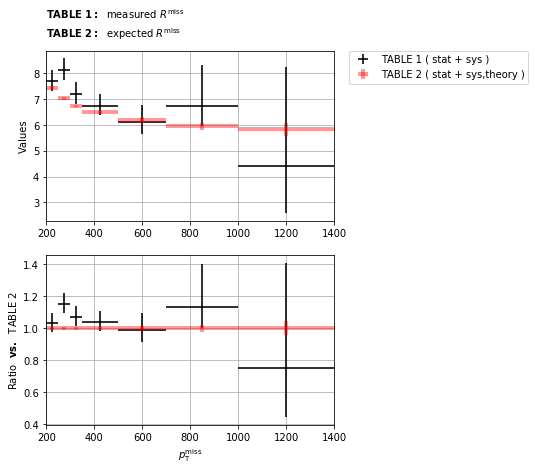

===    chi2 = 10.6964
===    bin ratios =  ['1.0363', '1.1550', '1.0713', '1.0401', '0.9903', '1.1347', '0.7547']
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $p_\text{T}^\text{miss}$


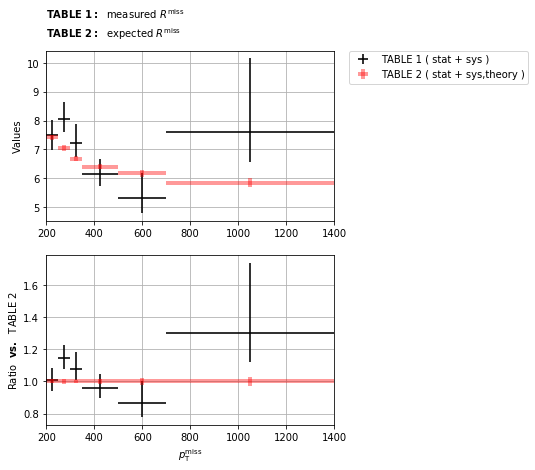

===    chi2 = 9.5341
===    bin ratios =  ['1.0108', '1.1449', '1.0793', '0.9578', '0.8636', '1.3031']
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $m_\text{jj}$


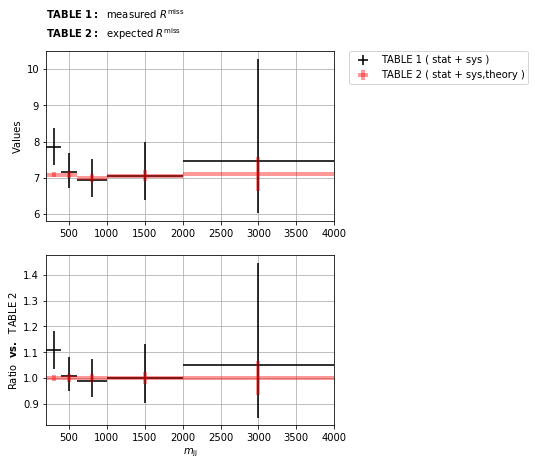

===    chi2 = 2.2605
===    bin ratios =  ['1.1086', '1.0085', '0.9900', '0.9986', '1.0492']
===    PLOTTING THE FOLLOWING RATIO  ( 1 divided by 2 )
===    1.   measured $R^\text{miss}$
===    2.   expected $R^\text{miss}$
===    as a function of:   $\Delta\phi_\text{jj}$


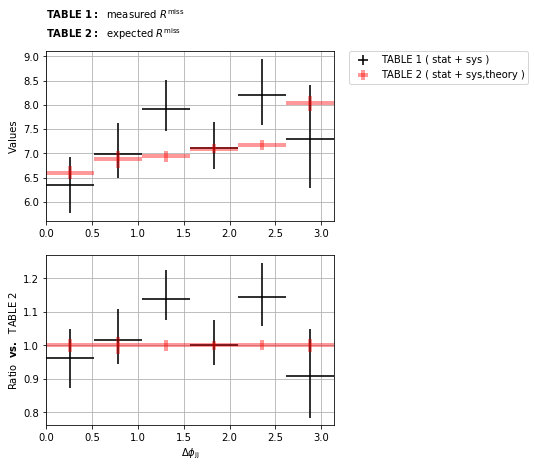

===    chi2 = 7.9056
===    bin ratios =  ['0.9621', '1.0145', '1.1398', '1.0014', '1.1435', '0.9078']
INFO	plot_ratios.py	Program reached the end without crashing and will close :) Have a nice day...


In [10]:
%run plot_ratios.py -r --show --num measured --den expected ../HEP_datasets/HEPData-ins1609448-v2-yaml/

<br>
<br>

So that is it! Hopefully some combination of
- plotting the contents of your yaml files
- comparing yaml tables with the contents of ROOT files
- plotting the measurement/SM ratio
will provide you with the tools needed to validate your yaml files in a human readable way.

<br>
<br>

# Help and feedback

This package is still in development. It really needs to be used in the real-world to see how it performs, what needs to be changed, what could be added, etc. I hope that over time it will provide a powerful tool for validating the physics content of our HEP data submissions, as we want to ensure the integrity of our published results. With this in mind, please contact stmenary@cern.ch if you need any help, or to provide feedback and suggestions. If this tool worked well for your analysis, it is important to know why, and if it didn't, it is even more important to know why not.